# Running Pipelines using NIRCam image simulated from Mirage


### This notebook will process a simulated data created in the Imaging_simulator_use_example notebook and serve as an example of running the JWST pipeline. 

***
<a id='resources'></a>
## Resources and Documentation

There are several different places to find information on installing and running the pipeline. This notebook will give a shortened description of the steps pulled from the detailed pipeline information pages, but to find more in-depth instructions use the links below. 

>1. JDox: https://jwst-docs.stsci.edu/display/JDAT/JWST+Data+Reduction+Pipeline
>2. Installation page: http://astroconda.readthedocs.io/en/latest/releases.html#pipeline-install
>3. Detailed pipeline information: https://jwst-pipeline.readthedocs.io/en/latest/jwst/introduction.html
>4. Help Desk (click on Pipeline Support): https://stsci.service-now.com/jwst?id=sc_category
>5. GitHub README installation instructions: https://github.com/spacetelescope/jwst/blob/master/README.md


If this is your first time trying to run the pipeline from a jupyter notebook, you need to install the jupyter notebook in your pipeline environment:
>1. In a new terminal, change the directory to your working directory, terminal command: cd [your working directory]
>2. Terminal command: source activate jwst_dev
(or whatever your environment name for the pipeline is)
>3. Terminal command: conda install jupyter
>4. Terminal command: jupyter notebook

**NOTE:** During your first run CRDS may download and cache reference files in $HOME/crds_cache.  On subsequent runs cached files will be used.

## Imports


In [1]:
import os

from astropy.io import fits
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
%matplotlib inline

from jwst.pipeline import Detector1Pipeline
from jwst.pipeline import Image2Pipeline
from jwst.pipeline import Image3Pipeline
from jwst.pipeline import 
from jwst import datamodels
from jwst.pipeline.collect_pipeline_cfgs import collect_pipeline_cfgs

In [15]:
from astropy.visualization import ZScaleInterval, SqrtStretch, ImageNormalize


In [31]:
# simple function to plot images
def plot_image(obj, index=None):
    if isinstance(obj, str):
        data = fits.getdata(obj)
    else:
        data = obj.data
    image = data[index] if index is not None else data
    norm = ImageNormalize(image, interval=ZScaleInterval(),
                      stretch=SqrtStretch())
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1, 1, 1)
    im = ax.imshow(image, origin='lower', norm=norm)
    fig.colorbar(im)
    plt.show()

## Download file

This step can be skipped if the file has already been created as part of the simulation notebook

In [7]:
from  astropy.utils.data import download_file

input_model = datamodels.open('https://data.science.stsci.edu/redirect/WFIRST/Tutorials/jwst_example/jw42424001001_01101_00001_nrcb1_uncal.fits')

In [46]:
input_model = "jw42424001001_01101_00001_nrcb1_uncal.fits"

***
<a id="pipeline_with_defaults"></a>
## Run Pipeline With Default Configuration

Pipelines can be run by using the .call() method on the Pipeline class and passing in a data file.   Running a pipeline generally executes each successive step on the output from the previous step.  The end result is an output data model.

Stage 1 consists of detector-level corrections that are performed on a group-by-group basis, followed by ramp fitting. The output of stage 1 processing is a countrate image per exposure, or per integration for some modes. 

In [47]:
output_model = Detector1Pipeline.call(input_model)
output_model

2020-07-22 14:02:41,267 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-07-22 14:02:41,276 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-07-22 14:02:41,284 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-07-22 14:02:41,294 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-07-22 14:02:41,303 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-07-22 14:02:41,312 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-07-22 14:02:41,322 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

<ImageModel(2048, 2048) from jw42424001001_01101_00001_nrcb1_uncal.fits>

Stage 2 processing consists of additional instrument-level and observing-mode corrections and calibrations to produce fully calibrated exposures. The details differ for imaging and spectroscopic exposures, and there are some corrections that are unique to certain instruments or modes. 

In [48]:
output_model = Image2Pipeline.call(output_model, save_results=True)

2020-07-22 14:03:57,654 - CRDS - ERROR -  Error determining best reference for 'pars-backgroundstep'  =   Unknown reference type 'pars-backgroundstep'
2020-07-22 14:03:57,664 - CRDS - ERROR -  Error determining best reference for 'pars-assignwcsstep'  =   Unknown reference type 'pars-assignwcsstep'
2020-07-22 14:03:57,677 - CRDS - ERROR -  Error determining best reference for 'pars-flatfieldstep'  =   Unknown reference type 'pars-flatfieldstep'
2020-07-22 14:03:57,688 - CRDS - ERROR -  Error determining best reference for 'pars-photomstep'  =   Unknown reference type 'pars-photomstep'
2020-07-22 14:03:57,707 - CRDS - ERROR -  Error determining best reference for 'pars-resamplestep'  =   Unknown reference type 'pars-resamplestep'
2020-07-22 14:03:57,713 - CRDS - ERROR -  Error determining best reference for 'pars-image2pipeline'  =   Unknown reference type 'pars-image2pipeline'
2020-07-22 14:03:57,723 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2020-07-22 14:03:57,

Stage 3 processing consists of routines that work with multiple exposures and in most cases produce some kind of combined product. There are unique pipeline modules for stage 3 processing of imaging, spectroscopic, coronagraphic, AMI, and TSO observations.

In [50]:
stage3_output = Image3Pipeline.call('jw42424001001_01101_00001_nrcb1_cal.fits', save_results=True)

2020-07-22 14:05:32,308 - CRDS - ERROR -  Error determining best reference for 'pars-assignmtwcsstep'  =   Unknown reference type 'pars-assignmtwcsstep'
2020-07-22 14:05:32,319 - CRDS - ERROR -  Error determining best reference for 'pars-tweakregstep'  =   Unknown reference type 'pars-tweakregstep'
2020-07-22 14:05:32,328 - CRDS - ERROR -  Error determining best reference for 'pars-skymatchstep'  =   Unknown reference type 'pars-skymatchstep'
2020-07-22 14:05:32,338 - CRDS - ERROR -  Error determining best reference for 'pars-outlierdetectionstep'  =   Unknown reference type 'pars-outlierdetectionstep'
2020-07-22 14:05:32,348 - CRDS - ERROR -  Error determining best reference for 'pars-resamplestep'  =   Unknown reference type 'pars-resamplestep'
2020-07-22 14:05:32,357 - CRDS - ERROR -  Error determining best reference for 'pars-sourcecatalogstep'  =   Unknown reference type 'pars-sourcecatalogstep'
2020-07-22 14:05:32,361 - CRDS - ERROR -  Error determining best reference for 'pars-i

## Displaying the images

Once the calibrated data has been created, it can also be visualized to examine the output

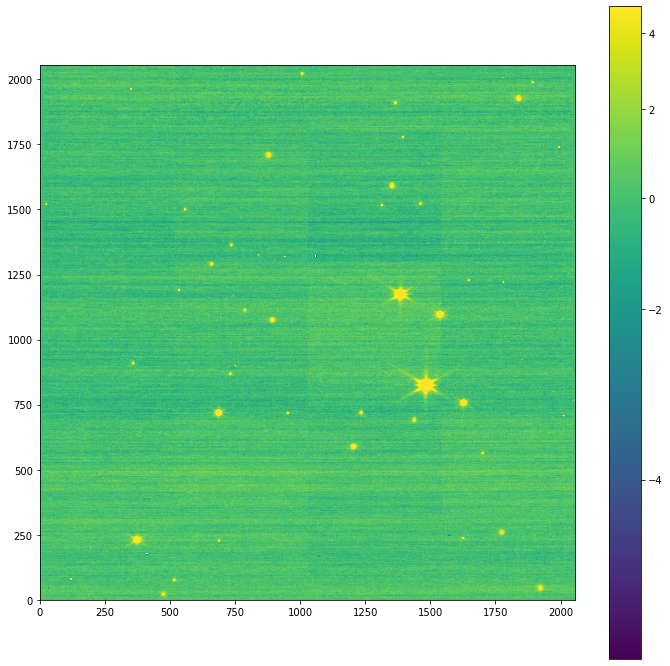

In [53]:
plot_image('jw42424001001_01101_00001_nrcb1_i2d.fits')

You can also 

In [61]:
from astropy.table import Table

In [62]:
cat = Table.read('jw42424001001_01101_00001_nrcb1_cat.ecsv')

2020-07-22 14:15:45,916 - stpipe - WARNING - /opt/conda/envs/jwst-cal/lib/python3.7/site-packages/astropy/io/ascii/connect.py:18: ResourceWarning: unclosed file <_io.TextIOWrapper name='jw42424001001_01101_00001_nrcb1_cat.ecsv' encoding='UTF-8'>
  return read(filename, **kwargs)



In [63]:
cat

id,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_30_50,CI_50_70,CI_30_70,is_star,sharpness,roundness,nn_dist,nn_abmag,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,pix,pix,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,pix,,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object
1,473.4136,22.4270,"53.093811514529314,-27.79668424251331",3.819128e-08,nan,2.112056e-05,nan,5.837397e-05,nan,7.594794e-05,nan,nan,nan,20.588236,nan,19.484452,nan,19.198710,nan,nan,nan,19.805396,nan,18.701612,nan,18.415870,nan,nan,nan,1.1038,0.2857,1.3895,nan,0.740464,-0.413376,9.675189,24.842574,8.983544e-05,nan,19.016381,nan,18.233541,nan,175.0,1.997067,1.871817,0.062717,74.123249,177.021697,"53.093882705068594,-27.79675064826319","53.09392153484429,-27.796600635732823","53.09369428190813,-27.796712482409163","53.09373311193018,-27.796562469931413"
2,464.9881,27.1831,"53.093901152372716,-27.796660683682507",2.431169e-08,nan,9.628758e-08,nan,3.058466e-07,nan,3.930503e-07,nan,nan,nan,26.441074,nan,25.186241,nan,24.913880,nan,nan,nan,25.658234,nan,24.403401,nan,24.131040,nan,nan,nan,1.2548,0.2724,1.5272,nan,0.652432,-1.450448,9.675189,19.016381,4.197304e-07,nan,24.842574,nan,24.059734,nan,6.0,0.945542,0.464360,0.508895,-37.198882,65.699566,"53.093911541125166,-27.796677550284034","53.09392016995883,-27.79664421416533","53.093873856505816,-27.796669917141514","53.09388248535042,-27.796636581025133"
3,1920.2108,46.0674,"53.08023238227822,-27.793725648656533",7.696884e-08,nan,3.770820e-05,nan,1.110592e-04,nan,1.461901e-04,nan,nan,nan,19.958911,nan,18.786113,nan,18.487705,nan,nan,nan,19.176070,nan,18.003273,nan,17.704865,nan,nan,nan,1.1728,0.2984,1.4712,nan,0.666936,-0.009978,12.671782,24.730841,1.890908e-04,nan,18.208324,nan,17.425484,nan,395.0,2.723531,2.582057,0.051945,-62.931003,39.967445,"53.08033658192424,-27.793848226290297","53.080390536656985,-27.793639880810943","53.0800916445697,-27.793798586742025","53.0801455997471,-27.793590241357894"
4,1931.0080,52.7002,"53.08014497979477,-27.793649758335654",2.377399e-08,nan,9.885376e-08,nan,3.467030e-07,nan,6.272485e-07,nan,nan,nan,26.412517,nan,25.050106,nan,24.406401,nan,nan,nan,25.629677,nan,24.267266,nan,23.623561,nan,nan,nan,1.3624,0.6437,2.0061,nan,0.769864,0.351312,12.671782,18.208324,4.652254e-07,nan,24.730841,nan,23.948001,nan,7.0,0.752225,0.679551,0.096612,4.818588,107.717036,"53.08015659606897,-27.79366263953787","53.080165228880524,-27.79362930427378","53.08011891346146,-27.793655002663577","53.08012754628398,-27.79362166740183"
5,515.0296,76.7438,"53.09353661848981,-27.796152149595468",1.787866e-08,nan,1.629543e-05,nan,3.694513e-05,nan,4.607792e-05,nan,nan,nan,20.869835,nan,19.981107,nan,19.741268,nan,nan,nan,20.086995,nan,19.198267,nan,18.958428,nan,nan,nan,0.8887,0.2398,1.1286,nan,0.824562,0.286041,68.426581,19.016381,5.076007e-05,nan,19.636194,nan,18.853354,nan,88.0,1.512014,1.455911,0.037105,68.796215,171.694663,"53.09357740103757,-27.796206

## Running the indivual steps 

In [54]:
from jwst.resample import ResampleStep
from jwst.source_catalog import SourceCatalogStep

In [58]:
output = ResampleStep.call('jw42424001001_01101_00001_nrcb1_cal.fits')

2020-07-22 14:11:23,552 - CRDS - ERROR -  Error determining best reference for 'pars-resamplestep'  =   Unknown reference type 'pars-resamplestep'
2020-07-22 14:11:23,557 - stpipe.ResampleStep - INFO - ResampleStep instance created.
2020-07-22 14:11:23,729 - stpipe.ResampleStep - INFO - Step ResampleStep running with args ('jw42424001001_01101_00001_nrcb1_cal.fits',).
2020-07-22 14:11:23,734 - stpipe.ResampleStep - INFO - Step ResampleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'exptime', 'single': False, 'blendheaders': True}
2020-07-22 14:11:24,374 - stpipe.ResampleStep - INFO - Drizpars reference file: /home/jovyan/crds_cache/references/jwst/nircam/jwst_nircam_drizpars_0001.fits
2020-07-2

In [66]:
source_catalog = SourceCatalogStep.call('jw42424001001_01101_00001_nrcb1_i2d.fits', output_file='test1', save_results=True)

2020-07-22 14:20:22,522 - CRDS - ERROR -  Error determining best reference for 'pars-sourcecatalogstep'  =   Unknown reference type 'pars-sourcecatalogstep'
2020-07-22 14:20:22,528 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2020-07-22 14:20:22,772 - stpipe.SourceCatalogStep - INFO - Step SourceCatalogStep running with args ('jw42424001001_01101_00001_nrcb1_i2d.fits',).
2020-07-22 14:20:22,779 - stpipe.SourceCatalogStep - INFO - Step SourceCatalogStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/home/jovyan/test1.ecsv', 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 100.0, 'kernel_fwhm': 2.0, 'kernel_xsize': None, 'kernel_ysize': None, 'snr_threshold': 3.0, 'npixels': 5.0, 'deblend': False, 'aperture_ee1': 30.0, 'aperture_ee2': 50.0, 'aperture_ee3': 70.0}
2020-07-22 14:20:23

## Run with different parameters

In [67]:
source_catalog = SourceCatalogStep.call('jw42424001001_01101_00001_nrcb1_i2d.fits', aperture_ee1=20, 
                                        aperture_ee3=80, output_file = 'test2', save_results=True)

2020-07-22 14:20:56,787 - CRDS - ERROR -  Error determining best reference for 'pars-sourcecatalogstep'  =   Unknown reference type 'pars-sourcecatalogstep'
2020-07-22 14:20:56,793 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2020-07-22 14:20:56,939 - stpipe.SourceCatalogStep - INFO - Step SourceCatalogStep running with args ('jw42424001001_01101_00001_nrcb1_i2d.fits',).
2020-07-22 14:20:56,948 - stpipe.SourceCatalogStep - INFO - Step SourceCatalogStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/home/jovyan/test2', 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 100.0, 'kernel_fwhm': 2.0, 'kernel_xsize': None, 'kernel_ysize': None, 'snr_threshold': 3.0, 'npixels': 5.0, 'deblend': False, 'aperture_ee1': 20, 'aperture_ee2': 50.0, 'aperture_ee3': 80}
2020-07-22 14:20:57,651 - st

In [70]:
cat2 = Table.read('test2_cat.ecsv')

2020-07-22 14:21:32,961 - stpipe - WARNING - /opt/conda/envs/jwst-cal/lib/python3.7/site-packages/astropy/io/ascii/connect.py:18: ResourceWarning: unclosed file <_io.TextIOWrapper name='test2_cat.ecsv' encoding='UTF-8'>
  return read(filename, **kwargs)



In [71]:
cat2

id,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper20_flux,aper20_flux_err,aper50_flux,aper50_flux_err,aper80_flux,aper80_flux_err,aper_total_flux,aper_total_flux_err,aper20_abmag,aper20_abmag_err,aper50_abmag,aper50_abmag_err,aper80_abmag,aper80_abmag_err,aper_total_abmag,aper_total_abmag_err,aper20_vegamag,aper20_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper80_vegamag,aper80_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_20_50,CI_50_80,CI_20_80,is_star,sharpness,roundness,nn_dist,nn_abmag,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,pix,pix,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,pix,,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object
1,473.4136,22.4270,"53.093811514529314,-27.79668424251331",3.819128e-08,nan,1.146904e-05,nan,5.837397e-05,nan,8.182214e-05,nan,nan,nan,21.251183,nan,19.484452,nan,19.117823,nan,nan,nan,20.468343,nan,18.701612,nan,18.334983,nan,nan,nan,1.7667,0.3666,2.1334,nan,0.740464,-0.413376,9.675189,24.842574,8.983544e-05,nan,19.016381,nan,18.233541,nan,175.0,1.997067,1.871817,0.062717,74.123249,177.021697,"53.093882705068594,-27.79675064826319","53.09392153484429,-27.796600635732823","53.09369428190813,-27.796712482409163","53.09373311193018,-27.796562469931413"
2,464.9881,27.1831,"53.093901152372716,-27.796660683682507",2.431169e-08,nan,5.828455e-08,nan,3.058466e-07,nan,2.589816e-06,nan,nan,nan,26.986116,nan,25.186241,nan,22.866828,nan,nan,nan,26.203276,nan,24.403401,nan,22.083988,nan,nan,nan,1.7999,2.3194,4.1193,nan,0.652432,-1.450448,9.675189,19.016381,4.197304e-07,nan,24.842574,nan,24.059734,nan,6.0,0.945542,0.464360,0.508895,-37.198882,65.699566,"53.093911541125166,-27.796677550284034","53.09392016995883,-27.79664421416533","53.093873856505816,-27.796669917141514","53.09388248535042,-27.796636581025133"
3,1920.2108,46.0674,"53.08023238227822,-27.793725648656533",7.696884e-08,nan,2.250134e-05,nan,1.110592e-04,nan,1.590977e-04,nan,nan,nan,20.519479,nan,18.786113,nan,18.395840,nan,nan,nan,19.736639,nan,18.003273,nan,17.613000,nan,nan,nan,1.7334,0.3903,2.1236,nan,0.666936,-0.009978,12.671782,24.730841,1.890908e-04,nan,18.208324,nan,17.425484,nan,395.0,2.723531,2.582057,0.051945,-62.931003,39.967445,"53.08033658192424,-27.793848226290297","53.080390536656985,-27.793639880810943","53.0800916445697,-27.793798586742025","53.0801455997471,-27.793590241357894"
4,1931.0080,52.7002,"53.08014497979477,-27.793649758335654",2.377399e-08,nan,5.569366e-08,nan,3.467030e-07,nan,2.144434e-06,nan,nan,nan,27.035486,nan,25.050106,nan,23.071718,nan,nan,nan,26.252646,nan,24.267266,nan,22.288878,nan,nan,nan,1.9854,1.9784,3.9638,nan,0.769864,0.351312,12.671782,18.208324,4.652254e-07,nan,24.730841,nan,23.948001,nan,7.0,0.752225,0.679551,0.096612,4.818588,107.717036,"53.08015659606897,-27.79366263953787","53.080165228880524,-27.79362930427378","53.08011891346146,-27.793655002663577","53.08012754628398,-27.79362166740183"
5,515.0296,76.7438,"53.09353661848981,-27.796152149595468",1.787866e-08,nan,1.046444e-05,nan,3.694513e-05,nan,4.953724e-05,nan,nan,nan,21.350710,nan,19.981107,nan,19.662670,nan,nan,nan,20.567870,nan,19.198267,nan,18.879830,nan,nan,nan,1.3696,0.3184,1.6880,nan,0.824562,0.286041,68.426581,19.016381,5.076007e-05,nan,19.636194,nan,18.853354,nan,88.0,1.512014,1.455911,0.037105,68.796215,171.694663,"53.09357740103757,-27.796206

## Compare Catalogs

For example, we can also compare the catalogs as they have been measured with what has been input into the simulations. 

In [82]:
from astropy import units as u
from astropy.coordinates import SkyCoord


In [83]:
src = Table.read('example_notebooks/mirage/imaging_example_data/ptsrc_catalog.cat', format='ascii')

In [84]:
src

index,x_or_RA,y_or_Dec,nircam_f115w_magnitude,nircam_f356w_magnitude
int64,float64,float64,float64,float64
1,53.0886395,-27.8399952,20.0,20.116487342354695
2,53.0985009,-27.8398137,19.260460840444296,18.928463325974196
3,53.1908927,-27.8397675,18.99102919577392,18.825212043065342
4,53.1835798,-27.8396369,19.12797676602789,18.927948828780817
5,53.0786782,-27.8395462,18.178272570705897,18.65901962504327
6,53.0853725,-27.8398712,17.079620793089944,17.36600212645455
7,53.1341535,-27.8394346,20.502546948403833,20.912074299834863
8,53.1092816,-27.8393506,21.04200258007037,20.26570248305481
9,53.1576974,-27.839223,18.98357188175837,19.117205230320454


In [86]:
src_coo = SkyCoord(src['x_or_RA']*u.deg, src['y_or_Dec']*u.deg)

In [80]:
cat2['sky_centroid']

<SkyCoord (ICRS): (ra, dec) in deg
    [(53.09381151, -27.79668424), (53.09390115, -27.79666068),
     (53.08023238, -27.79372565), (53.08014498, -27.79364976),
     (53.09353662, -27.79615215), (53.09728021, -27.79687421),
     (53.09520863, -27.79514612), (53.09224545, -27.79456724),
     (53.0834487 , -27.79270683), (53.08208654, -27.79223044),
     (53.08343429, -27.78983995), (53.08815303, -27.79057811),
     (53.08617867, -27.78928511), (53.08619228, -27.78920419),
     (53.09331132, -27.79048657), (53.08080791, -27.78804646),
     (53.08816629, -27.78944113), (53.09081998, -27.78998346),
     (53.0881591 , -27.78935941), (53.08131996, -27.78795727),
     (53.08454044, -27.78837583), (53.08058833, -27.78748761),
     (53.08595873, -27.78846661), (53.08604895, -27.78808814),
     (53.08656336, -27.78797389), (53.09321713, -27.78915253),
     (53.08679063, -27.78787534), (53.09308123, -27.78886852),
     (53.09682254, -27.78952735), (53.08279224, -27.78656204),
     (53.09729552, -

In [87]:
idx, d2d, d3d = cat2['sky_centroid'].match_to_catalog_sky(src_coo)


In [88]:
idx

array([ 737,  737,  803,  803,  747,  743,  780,  783,  828,  853,  888,
        882,  909,  909,  887,  945,  907,  883,  907,  945,  935,  945,
        988,  988,  988,  901,  988,  901,  895,  999,  895,  954, 1032,
       1032,  949, 1030,  953,  953,  999, 1028,  986,  986, 1819, 1005,
       1005, 1834, 1068, 1078, 1829, 1105, 1863, 1094, 1179, 1863, 1147,
       1179, 1113, 1185, 1179, 1153, 1159])

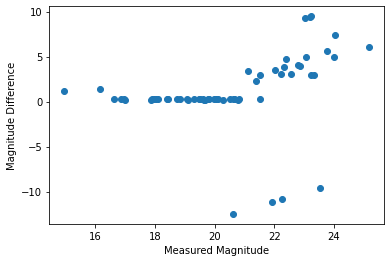

In [99]:
plt.plot(cat2['aper80_abmag'], cat2['aper80_abmag']-src['nircam_f115w_magnitude'][idx], ls='', marker='o')
plt.xlabel('Measured Magnitude')
plt.ylabel('Magnitude Difference')
plt.show()